In [2]:
#Add matplotlib
%matplotlib inline

#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = 'Resources/ride_data.csv'

In [9]:
#Read City data and store in df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [10]:
#read ride data and store in df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


In [13]:
#get the columns and rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [15]:
#get data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [16]:
#get unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [19]:
#get the number of data point from the Urban cities
sum(city_data_df['type']=="Suburban")

36

In [21]:
#get the columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [22]:
#get the data types for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [29]:
#combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=['city', 'city'])

#display DF
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [36]:
#create hte Urban city DF
urban_cities_df = pyber_data_df[pyber_data_df['type'] =="Urban"]

#Create the suburban cities dF
suburban_cities_df = pyber_data_df[pyber_data_df['type'] =="Suburban"]

#Create the rural cities dF
rural_cities_df = pyber_data_df[pyber_data_df['type'] =="Rural"]


In [37]:
#get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

#get the number for rides for suburan cities
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

#get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']


In [39]:
#get average fare for each city in urban cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

#get average fare for each city in suburban cities
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

#get average fare for each city in rural cities
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']


In [42]:
#get average number of drivers for urban city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']

#get average number of drivers for suburban city
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

#get average number of drivers for rural city
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']


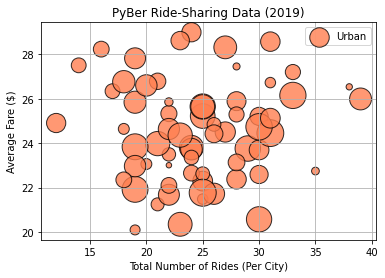

In [47]:
#build a scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, 
            c='coral', edgecolor='black', linewidths=1, alpha=0.8, label='Urban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

#Add the legend
plt.legend()

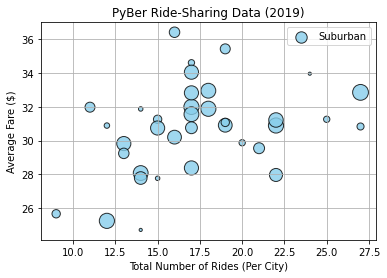

In [49]:
#build a scatter plot for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, 
            c='skyblue', edgecolor='black', linewidths=1, alpha=0.8, label='Suburban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

#Add the legend
plt.legend()

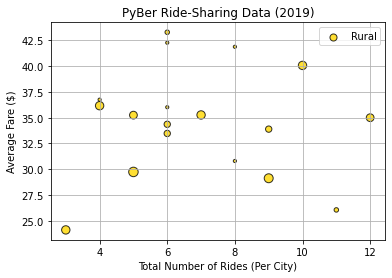

In [50]:
#build a scatter plot for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, 
            c='gold', edgecolor='black', linewidths=1, alpha=0.8, label='Rural')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

#Add the legend
plt.legend()

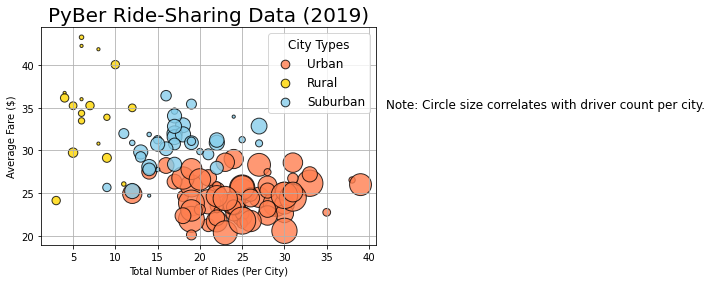

In [58]:
#Add the scatter charts for each type of city
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, 
            c='coral', edgecolor='black', linewidths=1, alpha=0.8, label='Urban')

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, 
            c='gold', edgecolor='black', linewidths=1, alpha=0.8, label='Rural')

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, 
            c='skyblue', edgecolor='black', linewidths=1, alpha=0.8, label='Suburban')



#Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

#Create a legend
lgnd= plt.legend(fontsize='12', mode='Expanded', 
                scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Incoprate a text label about circle size
plt.text(42,35, "Note: Circle size correlates with driver count per city.", 
        fontsize='12')

#save the figure
plt.savefig('Analysis/Fig1.png')


#show the plot
plt.show()

